In [10]:
using Plots
pyplot()

Plots.PyPlotBackend()

# Lecture 7a - Plasma Physics

**Christopher Brady and Heather Ratcliffe**

**Research Software Engineering / Physics**

## Overview

This topic is going to cover *Plasma Physics*. Plasmas (more on this in a moment) are sometimes called the fourth state of matter and are ubiquitous in physics. They're vitally important in astrophysics, solar-terrestrial physics such as space weather, space flight, and on Earth they are key in many lab experiments, industrial applications and nuclear fusion devices. 

Plasmas are described by an apparently simple set of equations which we'll introduce to you fully in the second part of this lecture, understandable without complex mathematics, but in practice, these equations are almost insoluble on paper. There are two primary reasons for this. 

Firstly the topic of non-linearity, which you will likely meet again in the complexity topic. Linearity means that  the addition of two (or more) solutions to the equations is itself a solution. For instance a violin string can play several notes at once without the notes interfering with each other. This feature allows massive simplifications, but doesn't hold in many interesting plasmas (including most of those mentioned above).

Secondly, there is the sheer number of particles in a plasma. The number of particles per cubic metre can reach $10^{20}$ or even $10^{30}$. Simulating each individual particle of even a small blob of plasma on today's largest computers would take years. If the particles are all allowed to interact in pairs, the problem is simply impossible. Even in space plasmas where densities are much lower, the distances involved are much larger and the problem gets no easier.

These, and other reasons, mean that computer simulations of plasmas and how they are affected by electromagnetic radiation, other sorts of waves (sound waves for example) and how their particles, move, interact, collide, radiate, and undergo nuclear fusion or fission are vital. This lecture will briefly describe what a plasma is, and go through some of the simplest physics that we do on a computer.

This lecture is explicitly split into two. The first part is tied to the exercises for this section and concentrates mostly on being understandable without extensive background but more represents the very beginnings of computational plasma physics rather than common tools in use by researchers. The second part gives a very, very brief introduction to more realistic simulations but has no exerises associated with it directly, since it is rather more complicated.

# Plasma Physics in a nutshell - Plasmas and waves

Plasma is a different state of matter. If you heat a solid, it melts into a liquid, if you heat a liquid, it boils into a gas and finally if you heat a gas enough the electrons in it's atoms are pulled out of their orbits by the violence of their thermal motions and you have a plasma.

You are left with a collection of freely moving, uncoupled, negatively charged electrons and positively charged ions. In many senses it still behaves like a gas: you can define pressure, temperature and density for a plasma. The difference comes only when a plasma interacts with an electromagnetic (EM) field, such as a light source (usually a powerful laser in laboratory situations). Like metals, the free electrons move collectively in response to applied EM fields, but unlike in metals where the strong metal lattice holds the atoms in place, the ions in a plasma are also free to move. The collective motions of electrons and ions means that *moving plasma generates it's own additional EM fields* leading to complex behaviours much richer than exist in normal gasses. Despite all of this additional richness, one of the most important ways of looking at plasmas is in terms of the waves in them.

## Waves in overview
Waves are a common phenomenon that we see in everyday life. You see waves in water, waves on strings, waves of traffic during the rush hour and of course rely on sound waves to talk to each other. You tend to think of a wave as "an oscillation in something". The string oscillates when you pluck it etc. At a deeper level, waves are two or more coupled forms of energy that exchange back and forth. You start the oscillation by introducing energy in one form (plucking the string) and it converts to the other form and then back again. A wave on a string exchanges energy between elastic energy and kinetic energy - the parts of the string that are most taut are the ones that aren't moving and the parts that are moving fastest have little or no elastic energy in them. Waves in water exchange kinetic energy of the fluid with gravitational energy as they rise up, and sound waves exchange kinetic energy and energy in the fluid pressure as the air compresses and expands.

More mathematically, in a uniform medium almost every phenomenon that gives rise to "normal" waves can be described by the wave equation (you actually usually get two wave equations, one for each of the energy forms, but they are uncoupled so you usually just consider one of them). This describes the behaviour of the wave as it varies in space and time and contains a single parameter $c$ which is the speed of the wave ($c$ is also a physical constant, the speed of light in vacuum. Here it's just a constant for this equation). In 1D the wave equation looks like

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

you don't really need to understand this equation here, but if you're feeling mathematically inclined you can test that there are an infinite number of solutions, all of the form $u=f(x-ct)$, where $f$ is any "well behaved" (differentiable (strictly holomorphic)) function. (Aside: The $\partial$ operator is the partial derivative. It doesn't really matter what it is, but you evaluate it like the full derivatives in a single variable that you're familiar with. So $\partial (x^2)/\partial x = 2x$ just as expected.) The classic wave that we all know and love comes about when you use $u=\sin{(x-ct)}$, but if you try $u=(x-ct)^3$ you'll find that it's still a solution.

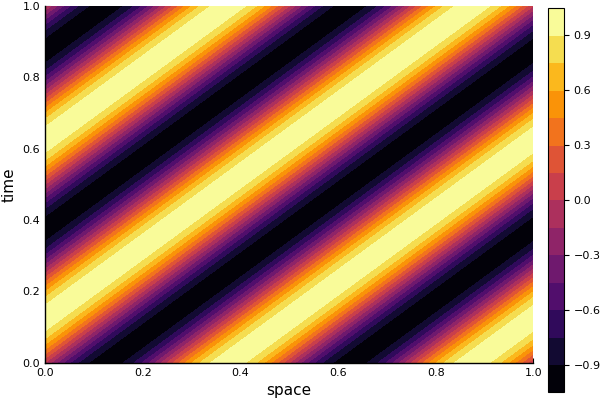

In [11]:
#Creates an approximation to a travelling wave on a finite grid
nx=100 # Number of space points
nt=100 # Number of time points
u=zeros(nx,nt)
x=linspace(0.,1.0,nx)
t=linspace(0.,1.0,nt)

c = 1.0 #Speed of the wave
for ix in 1:nx
    for it in 1:nt
        #Multiply by 4pi to make the graph look interesting
        u[ix,it] = sin(4.0*pi*(x[ix] - c * t[it]))
    end
end

plot(x,t,u,fill=true,xlab="space",ylab="time")

You can define an equivalent form for waves with varying speeds, but writing down the solution is much harder. In the most general cases you can get waves that have wave speeds that depend on position, time and frequency. In general these equations can only be solved numerically. Waves where the speed of propagation depend on frequency are called *dispersive*, and in general most physically interesting waves are dispersive to a greater or lesser degree.

## Waves in vacuum

### Overview

In a perfect vacuum, there is no matter. There can be no sound waves, no plucked strings because there is no material to carry the wave, but waves do still exist even in a perfect vacuum. By far the most common kind of wave that exists in a vacuum is the electromagnetic (EM) wave (there are also more exotic waves like gravity waves, but we'll ignore them here).

Electromagnetic waves also exchange energy between two forms. As the name suggests EM waves consist of a paired electric field (usually called an E field) and magnetic field (usually called a B field), and the wave is generated by the exchange of energy between these two fields.

Because plasmas are formed by splitting up the atoms in a gas into charged electrons and ions and charged particles interact with electric and magnetic fields, it is necessary to start with a quick overview of electric and magnetic fields and EM waves before we can understand waves in plasmas.

### Electric and Magnetic Fields as vector fields

Electric(E) and magnetic(B) fields are what are termed *vector fields* - that is that they have both a strength and a direction. The idea behind this should be familiar from the old experiment of putting iron filings on a piece of paper over a magnet. The lines that you see on the paper show the local direction of the magnetic field. This means that to define an electric or magnetic field you have to define both strength and direction of the fields. This is particularly important for defining electromagnetic waves.

<img src="img/Magnet.png">
Figure from Practical Physics N.H.Black and H.N.Davis (1913). Image in public domain.

### Electromagnetic waves
The fact that electric and magnetic fields have directions is very important, because it provides the last bit of the description of what an EM wave looks like. The E and B fields are oriented at 90 degrees to each other, and to the direction of the wave. So if you looked along an EM wave travelling towards you (and you could see electric and magnetic fields) you'd see the E field oscillating across your vision and the B field oscillating up and down. (The other way around, or both of them going diagonally is also quite possible, they just need to be at 90 degrees to each other). You can see this schematically below

<img src="img/EMR.svg">
Figure by SuperManu on Wikipedia. Used under creative commons license

### Wave speeds and dispersion relations
Electromagnetic waves in a vacuum famously travel at a fixed speed $c \approx 3 \times 10^8 \mathrm{m/s}$, and this can be seem from the wave equations for EM waves, $\frac{\partial^2 u}{\partial t^2} = \frac{1}{\mu_0 \epsilon_0} \frac{\partial^2 u}{\partial x^2}$. $\mu_0$ and $\epsilon_0$ are both fundamental constants called the permiability of free space and the permittivity of free space, so $c^2=\frac{1}{\mu_0 \epsilon_0}$ is also a constant. There is however a much simpler formula for the speed of a wave $c = f \lambda$ where $f$ is the frequency and $\lambda$ is the wavelength. You can combine these two forms to get an explicit relationship between the frequency and the wavelength.

$\lambda = \frac{\sqrt{\mu_0 \epsilon_0}}{f}$

Generally, physicists don't work with the frequency and wavelength that we're all familiar with but with _angular frequency_ (confusingly often just called frequency by working physicists) $\omega = 2\pi f$ and _wavenumber_ $k = \frac{2 \pi}{\lambda}$. Using these forms instead you get $\frac{\omega}{k} = \sqrt{\mu_0 \epsilon_0} = c$. The equation $\frac{\omega}{k} = c$ is generally true, and is the formal definition of the *phase speed* of a wave (there is another kind of speed called the *group speed* $\frac{\partial \omega}{\partial k}$, but the difference is too subtle for a single lecture). The relation between $\omega$ and $k$ is often called the *dispersion relation*.

### Dispersion diagrams
Once you have defined the dispersion relation between frequency and wavenumber it is often worth drawing the *dispersion diagram*. At it's simplest the dispersion diagram is just a graph of $k$ vs $\omega$. Negative values of k simply change the direction of propagation from left to right to right to left. By convention $\omega$ is generally kept positive (although some mathematical formalisms do use negative $\omega$). An important point is to remember that a straight line (as in $\omega = C * k$ where $C$ is a constant) means that a wave is non-dispersive (since $\omega/k = C$)

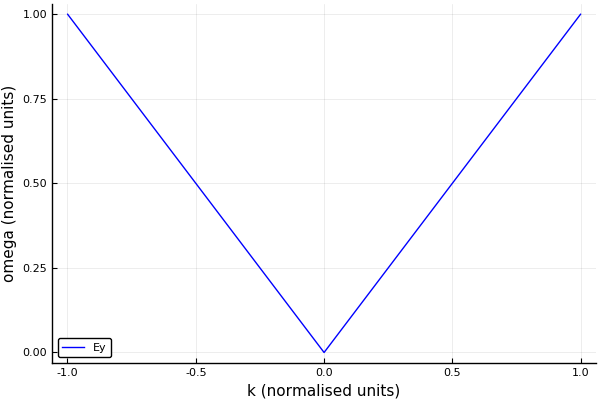

In [15]:
#Plots the dispersion diagram for an EM wave in a vacuum

#Work with normalised units such that mu0 = epsilon0 = c = 1
mu0 = 1.0
epsilon0 = 1.0

k = linspace(-1.0,1.0,101)
ω = sqrt.(mu0 * epsilon0 * k.^2)

plot(k, ω, c=:blue, label="Ey", xlab="k (normalised units)", ylab ="omega (normalised units)")

The dispersion relation is very boring for an EM wave in a vacuum, just a straight line, but it can get more interesting for a general wave.

## Waves in plasmas

### Electron plasma (Langmuir) waves

There are many forms of plasma waves, but the simplest is the Langmuir or electron plasma wave. In this wave, imagine the situation below.

<img src="img/PlasmaFrequency0.png">

You have a chunk of plasma consisting of electrons and ions. The ions are much, much heavier than the electrons (1836.2 times heavier even for hydrogen and getting larger for heavier elements) so they don't move very fast compared to the electrons and can be almost ignored (for electron plasma waves).

<img src="img/PlasmaFrequency.png">

Imagine that you take all of the electrons in a thin strip and displace them from their original location. Your plasma now has a region of low electron density and a region of high electron density. This leads to an electric field that increases linearly the further away you displace your strip ($x$), linearly with higher electron density ($n_e$) and scaled with the charge on an electron (a fundamental constant, but often written $q_0$)

$$E = \frac{n_e q_0 x}{\epsilon_0}$$

An electron within this region then experiences a force since it is a charged particle in an electric field

$$F_e = -q_0 E = - \frac{n_e q_0^2 x}{\epsilon_0} = C x$$

 where $C$ is just gathering together terms in the equation that are not $x$. This form of force might look familiar from school science - it is the restoring force of a spring displaced from its natural length by a distance $x$ where $C$ is the spring constant (the spring constant is usually written $k$, but that would be confusing here). Combining that with Newton's law of motion $F_e = m_0 a = m_0 \frac{\partial^2 x}{\partial t^2}$ (where $m_0$ is the mass of an electron) you can solve for the motion of an electron. It turns out to have exactly the same solution as a simple harmonic oscillator - oscillations with a frequency
 
$$\omega_{pe} = \sqrt{\frac{n_e q_0^2}{\epsilon_0 m_0}}$$

$\omega_{pe}$ is called the electron plasma frequency and is the most important frequency in plasma physics. This derivation is not at all rigorous - it ignores lots of effects, most notably that the electrons moving back cancel some of the electric field that they generated when you displace them, but that expression for the plasma frequency is exact.

### Dispersion of plasma waves
$\omega_{pe} = \sqrt{\frac{n_e q_0^2}{\epsilon_0 m_0}}$ notably doesn't include any terms in $k$, so when you try to define the group speed $\frac{\partial \omega}{\partial k}$ you get 0, implying that this isn't a travelling wave. This isn't because the electron plasma wave doesn't exist, but because we're missing some important physics. Including thermal motions of the electrons allows you to derive a correction.

Deriving the correction is far beyond the scope of a single lecture like this, so we'll just introduce the final dispersion relation (called the Bohm-Gross dispersion relation after it's first derivers)

$$\omega^2 = \omega_{pe}^2 + \frac{3 k_B T_e k^2}{m_0} = \omega_{pe}^2 + 3 v_{e,th}^2 k^2$$

$k_B$ is Boltzmann's constant which relates temperatures and energies and $T_e$ is the electron temperature and $v_{e,th}$ is the electron thermal velocity. The electron thermal velocity is the average speed of an electron as it undergoes random motion due to it's temperature.

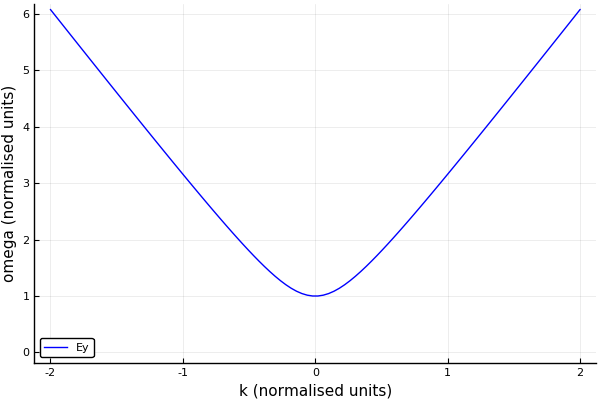

In [14]:
#Plots the dispersion diagram for an EM wave in a vacuum

#work in normalised units so that wpe = 1 and v_therm = 1
ω_pe = 1.0
v_therm = 1.0

k = linspace(-2.0,2.0,100)
ω = sqrt.(ω_pe^2 + (3 * v_therm * k).^2)

plot(k, ω, c=:blue, label="Ey", 
     xlab="k (normalised units)", 
     ylab="omega (normalised units)", ylim=[0,6])

This is much more interesting. While at large $k$ the dispersion relation is back to being nearly a straight line (all wavelengths with the same speed), unlike the EM waves in a vacuum even at $k=0$ (infinite wavelength) there's a finite value of $\omega$. This means that there's a minimum frequency (the electron plasma frequency) below which no electron plasma wave can exist. This means that if you try to drive a plasma at a frequency below the plasma frequency the energy will be absorbed. The reason for this is that below the plasma frequency the plasma can react collectively to damp the wave. At frequencies at or above the plasma frequency the wave acts "too fast" for this process to occur. (This isn't strictly true, but it's a decent approximation)

### EM waves in a plasma

Because EM waves have electric and magnetic fields in them, charged particles such as those in a plasma interact with them directly, just as they did to the electric field generated by moving a chunk of the plasma itself. The main effect at low intensities is due to the electric field and cause the electrons to oscillate (usually called "quiver" for historical reasons) at the same frequency as the laser. As you might expect, this effect of this motion is similar to the concept of moving a slab of plasma to generate electron plasma waves. It is, however, rather harder to derive the expressions

The dispersion relation for an EM wave in a plasma is 

$$\omega^2 = \omega_{pe}^2 + c^2 k^2.$$ 

This has two interesting features. At high values of $k$ (corresponding to short wavelength) the $\omega_{pe}^2$ term is very small compared to the $c^2 k^2$ term, so $\omega^2 \approx c^2 k^2$. This means that at short wavelengths EM waves propagate almost exactly the same way they would in a vacuum.

At the other end of very small $k$ the $\omega_{pe}^2$ term dominates meaning that $\omega$ is nearly constant and the group velocity is nearly zero. This is for much the same reason as for electron plasma waves. At low frequencies the plasma reacts collectively, acting as an aerial. The incoming EM radiation is converted into electron motion, which just like the electrons driven by a power amplifier or klystron in a transmitter aerial reemit the EM radiation back out again. At higher frequencies, the electrons still react in the same way but since you are trying to move them "faster" than their natural frequency the effect is incomplete and the wave is able to propagate into the plasma.

### Other waves in plasmas

Cataloguing the waves that plasmas can support is a fairly thankless task. You have a family of waves that exist in all plasmas (at least at some wavelengths) like electron plasma waves, EM waves and ion acoustic waves (sort of a bit like sound waves in a plasma), but those are a long way short of everything that can exist. When you add a background magnetic field to a plasma additional families of waves appear, and you have a whole range of waves from X and O modes to whistler waves and electron Bernstein waves. There are additional complications because waves are often first discovered in one regime (whether that's a certain type of plasma or a certain mathematical formalism) and then discovered again in another. If it isn't immediately clear that the two waves are the same, they are named separately and develop separate research communities and even when they are found to be the same wave the two names often stick around in the different communities anyway.

### Combining waves - parametric instabilities

Having a whole load of waves in your plasma isn't very interesting in itself. To get the observed richness of behaviour in plasmas you have to have mechanisms to couple between wave modes. We've already hinted that this happens because the electron plasma frequency appears in the dispersion relation for EM waves. There are actually a *lot* of mechanisms to couple energy between wave modes in a plasma, but one of the simplest (not that that's saying a lot) is the parametric instability. Parametric instabilities involve three or more interacting waves, and can be two waves combining into a single wave, a single wave breaking down into two waves, a wave losing energy by emitting another wave, a wave *gaining* energy from another wave or even more complicated combinations. They're a general wave phenomenon rather than plasma physics strictly, but they are important in plasma physics so we're going to cover them.

While the maths of real parametric instabilities is very tricky, there's a couple of simple ways to get a heuristic grasp on what's going on. My preferred one is to ask the question "what do you actually see locally when multiple waves are present at one place?". The answer isn't very complex - you have locally a given energy (related to the frequency $\omega$) and a given momentum (related to the wavenumber $k$). However the waves that we're talking about here are *linear* waves - that is that if you have two waves in the same place all of the fields etc. due to the waves combined is just the sum of the fields due to each wave individually (you can see this effect with waves on water. The wakes of two boats pass through each other happily and continue almost unchanged). This has a very important effect if you *could construct the local energy and momenta in more than one way*.

So what if you could satisfy energy and momentum conservation in two ways? Say if you could have either a single EM wave or an EM wave (with a different frequency and wavelength) and an electron plasma wave? The physics doesn't "know" that one solution is special, so the final result is that you tend to get a conversion from your source wave to the two daughter waves. In this case some of your EM wave will convert to another EM wave plus an electron plasma wave. This process is called "Stimulated Raman Scattering" or "SRS" and is very important in laser plasma physics